# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv") 
X = boston.drop(columns=['medv']).copy()
y = boston['medv']

In [27]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [28]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Todos os dados estao em float.

Não apresenta missing.

<Axes: >

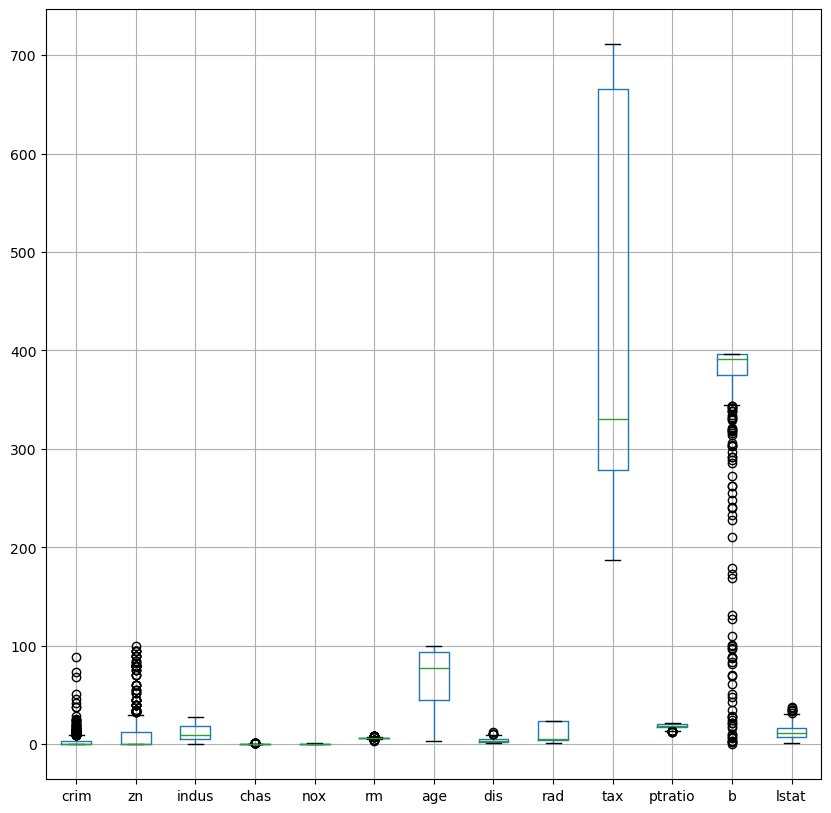

In [30]:
plt.figure(figsize=(10,10))
X.boxplot()

In [31]:
X.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


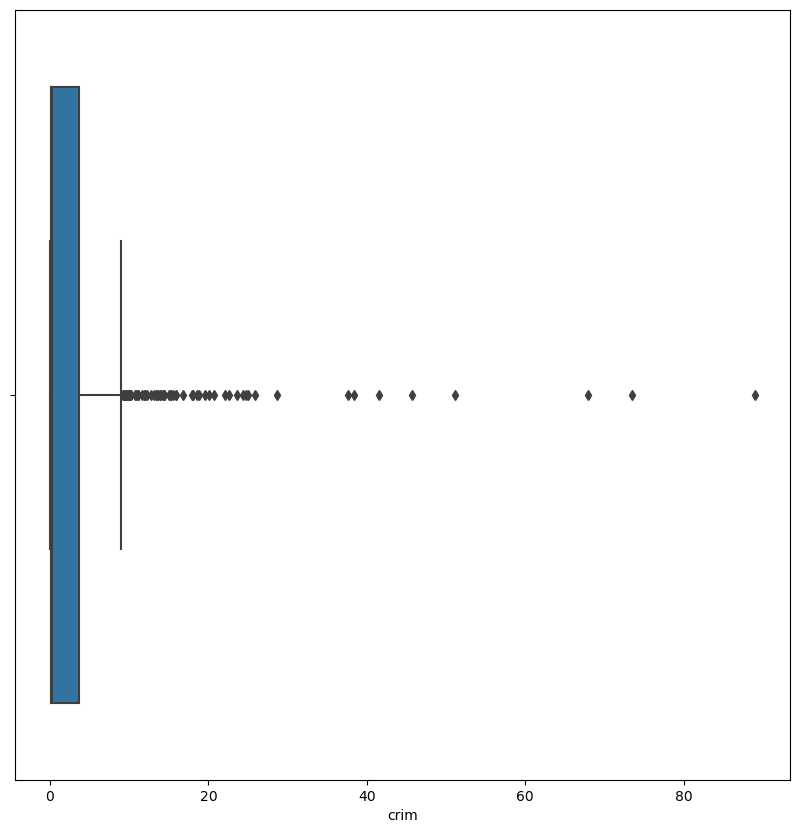

In [40]:
sns.boxplot(data=X, x='crim');

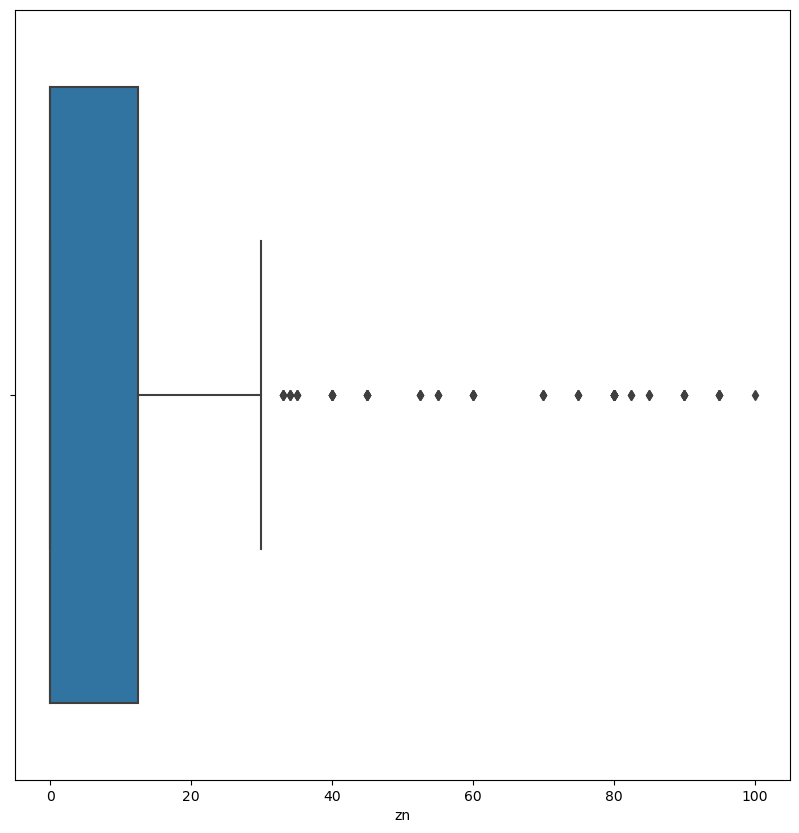

In [41]:
sns.boxplot(data=X, x='zn');

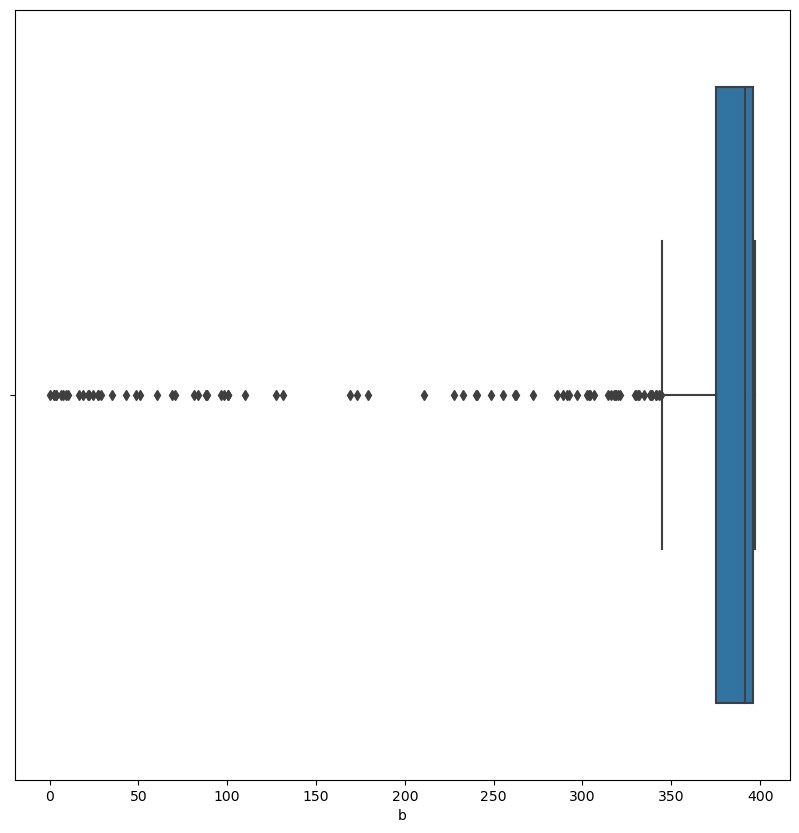

In [42]:
sns.boxplot(data=X, x='b');

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<Figure size 900x900 with 0 Axes>

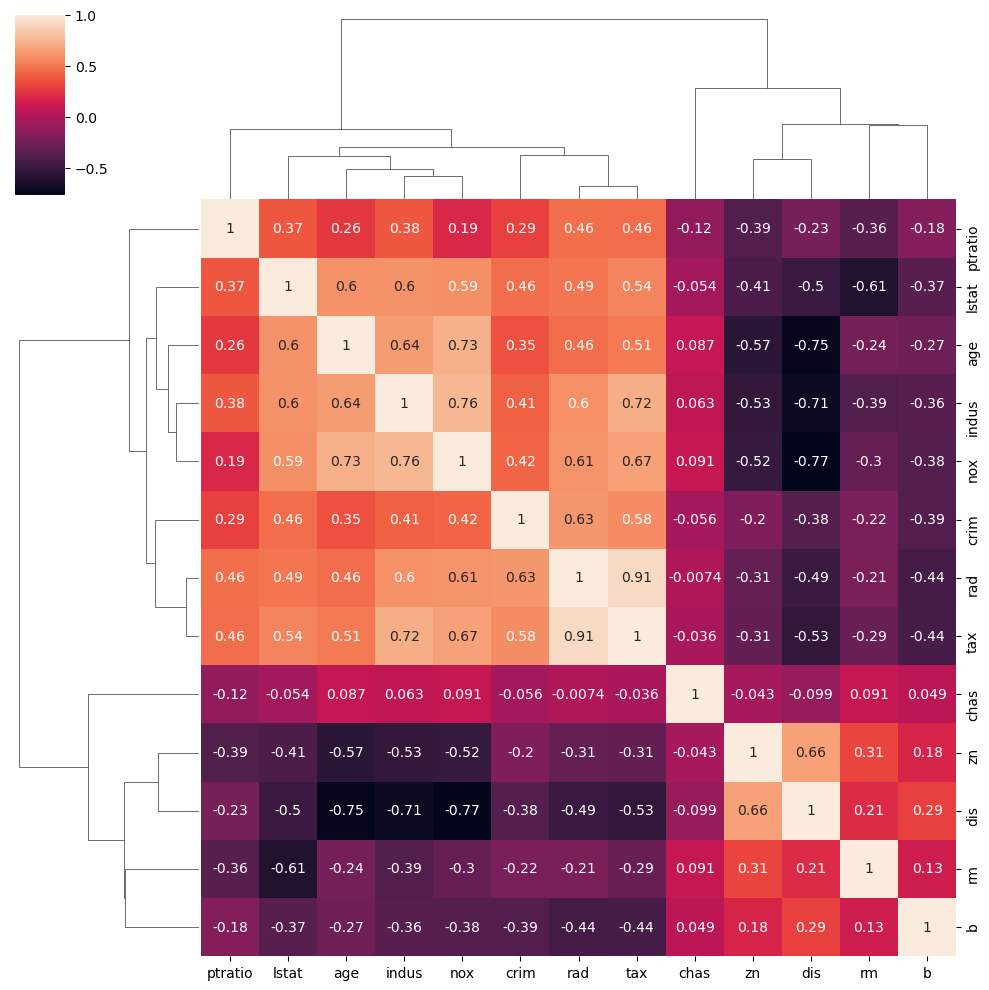

In [36]:
plt.figure(figsize=(9,9))
sns.clustermap(X.corr(), annot=True);

Correlações acima de 0.7

Variavel RAD tem uma forte correlação com TAX.
Vaiavel INDUS e AGE tem correlação forte com a variavel NOX.
Variavel INDUS, NOX e AGE tem uma forte correlação negativa com a DIS.

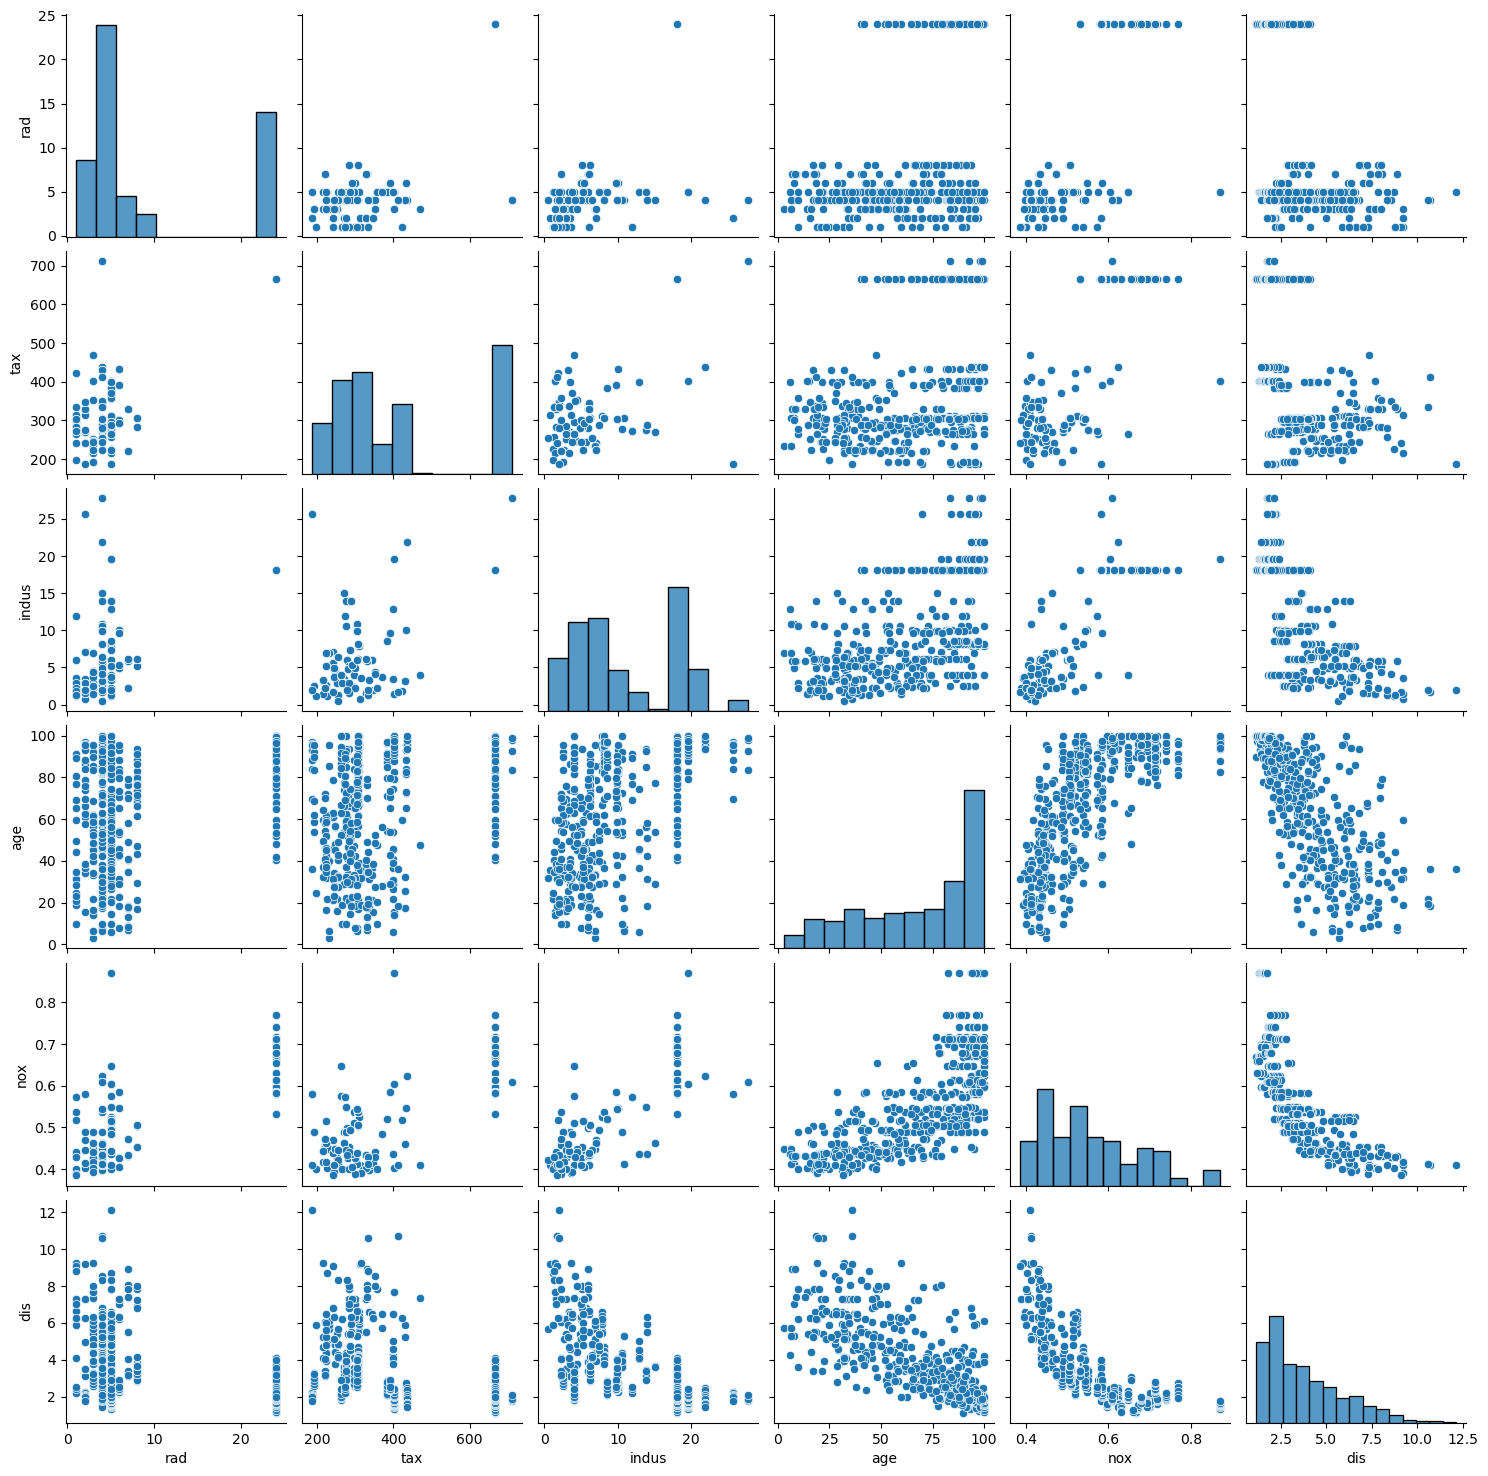

In [44]:
sns.pairplot(X[['rad', 'tax', 'indus', 'age', 'nox', 'dis']])

Vemos que a relação entre as variaveis NOX/DIS e as variaveis NOX/AGE apresenta uma correlação possivelmente exponencial.
As variaveis DIS/AGE apresentão uma correlação possivelmente linear.

<Axes: xlabel='nox', ylabel='dis'>

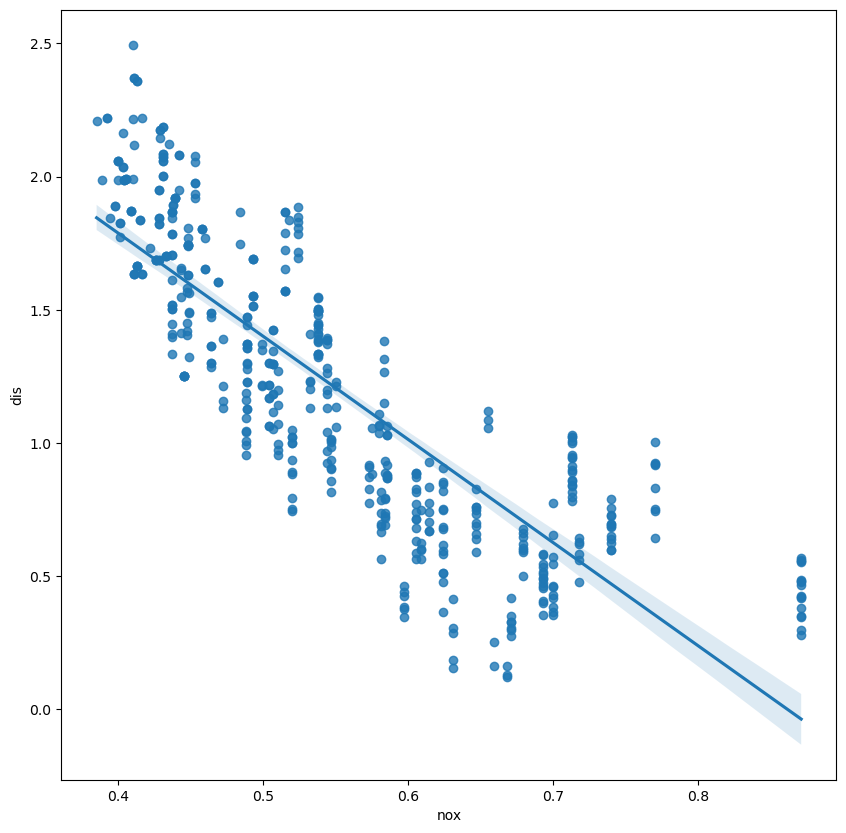

In [45]:
sns.regplot(x=X['nox'], y=np.log(X['dis']))

<Axes: xlabel='nox', ylabel='age'>

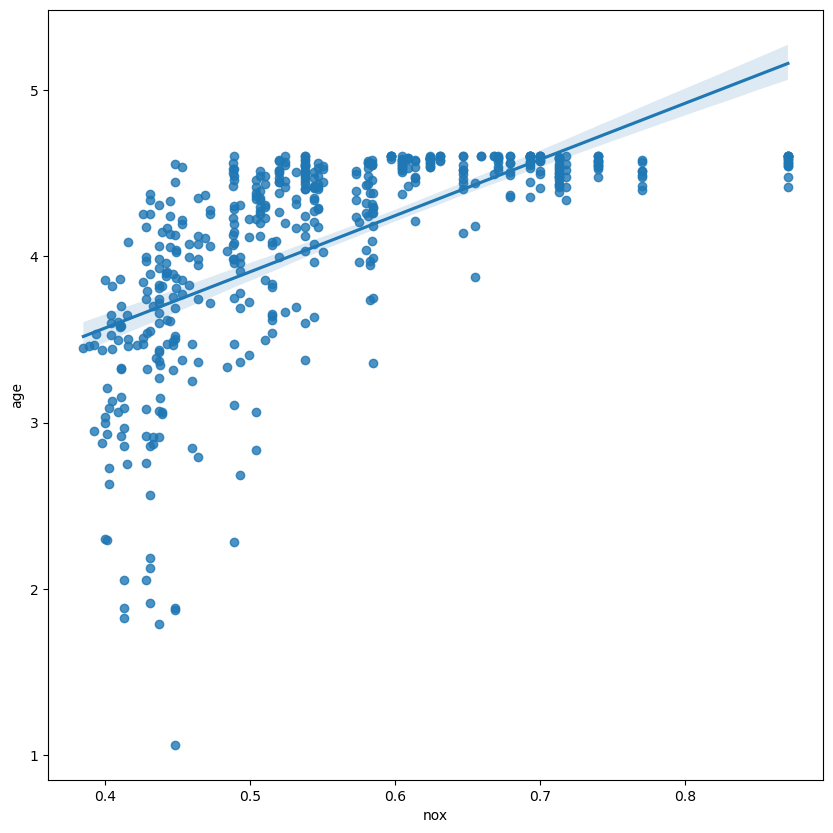

In [46]:
sns.regplot(x=X['nox'], y=np.log(X['age']))

<Axes: xlabel='dis', ylabel='age'>

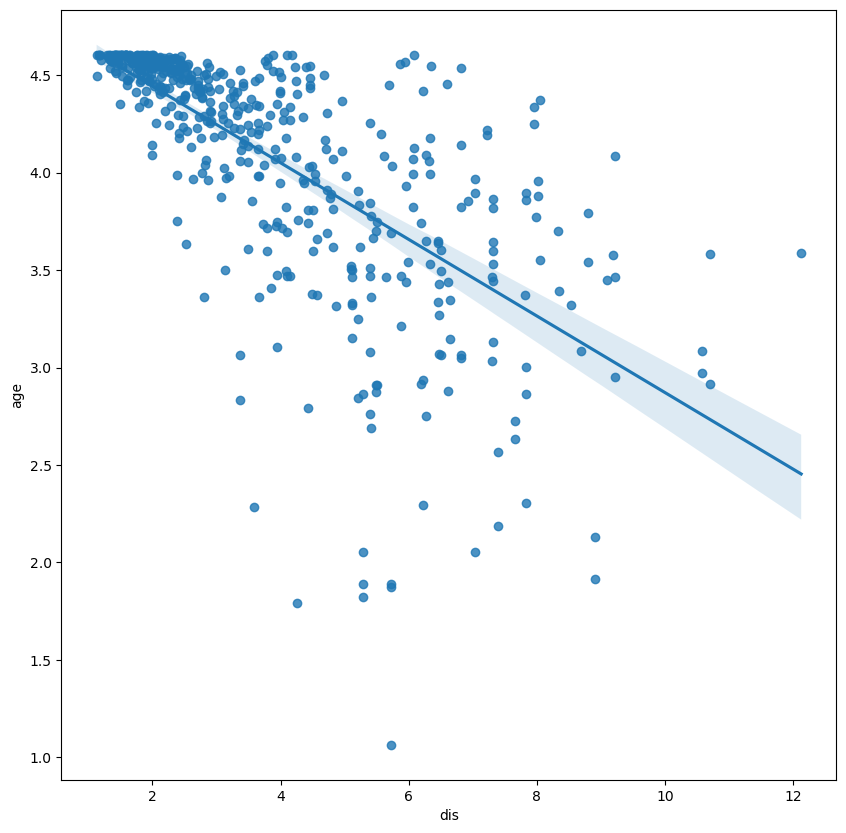

In [47]:
sns.regplot(x=X['dis'], y=np.log(X['age']))

In [48]:
df = X[['nox']].copy()
df.loc[:,'log_dis'] = np.log(X['dis'])
df.corr()

,nox,log_dis
nox,1.000000,-0.831977
log_dis,-0.831977,1.000000


In [49]:
df = X[['nox']].copy()
df.loc[:,'log_dis'] = np.log(X['age'])
df.corr()

,nox,log_dis
nox,1.000000,0.640442
log_dis,0.640442,1.000000


In [50]:
X.drop(['dis', 'age'], axis=1, inplace=True)

### 3. Separe os dados em validação e teste

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873, test_size=0.2)
print('train:', X_train.shape, y_train.shape)
print('test:', X_test.shape, y_test.shape)

train: (404, 11) (404,)
test: (102, 11) (102,)


In [52]:
import pickle
with open('boston.pkl', mode='wb') as m:
    pickle.dump([X_train, y_train, X_test, y_test], m)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [54]:
arv_1 = DecisionTreeRegressor(max_depth=8)
arv_2 = DecisionTreeRegressor(max_depth=2)

arv_1.fit(X_train, y_train)
arv_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [55]:
y_train_pred1 = arv_1.predict(X_train)
mse1 = mean_squared_error(y_train, y_train_pred1)

y_train_pred2 = arv_2.predict(X_train)
mse2 = mean_squared_error(y_train, y_train_pred2)

y_test_pred1 = arv_1.predict(X_test)
mse3 = mean_squared_error(y_test, y_test_pred1)

y_test_pred2 = arv_2.predict(X_test)
mse4 = mean_squared_error(y_test, y_test_pred2)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print('Base Treino:')
print(template.format(arv_1.get_depth(), mse1))
print(template.format(arv_2.get_depth(), mse2))

print('\nBase Teste:')
print(template.format(arv_1.get_depth(), mse3))
print(template.format(arv_2.get_depth(), mse4))

Base Treino:
O MSE da árvore com profundidade=8 é: 2.01
O MSE da árvore com profundidade=2 é: 25.20

Base Teste:
O MSE da árvore com profundidade=8 é: 18.85
O MSE da árvore com profundidade=2 é: 29.30


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Acredito que a arvore mais adequada seja a arv_1 com pronfundidade maior e com o MSE de menor valor.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

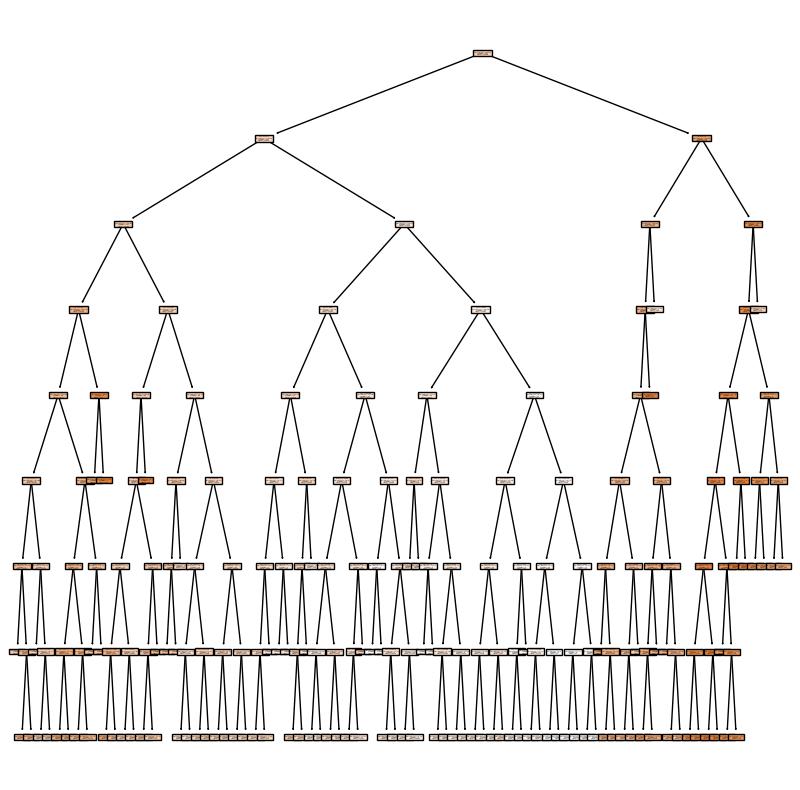

In [56]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arv_1, 
                    feature_names=X.columns,  
                    filled=True)